In [52]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

ds = xr.open_dataset('ERA5_Data/2024_SouthAfrica.nc')


In [51]:
ds_combine =ds.sel(expver=1).combine_first(ds.sel(expver=5))
ds_combine.load()


<xarray.Dataset> Size: 218MB
Dimensions:    (time: 2817, latitude: 34, longitude: 71)
Coordinates:
  * longitude  (longitude) float32 284B 15.56 15.81 16.06 ... 32.56 32.81 33.06
  * latitude   (latitude) float32 136B -26.89 -27.14 -27.39 ... -34.89 -35.14
  * time       (time) datetime64[ns] 23kB 2024-01-01 ... 2024-04-27T08:00:00
Data variables:
    u10        (time, latitude, longitude) float64 54MB -1.21 -1.9 ... -0.3329
    v10        (time, latitude, longitude) float64 54MB -0.4408 ... 6.066
    t2m        (time, latitude, longitude) float64 54MB 291.4 291.8 ... 290.3
    sp         (time, latitude, longitude) float64 54MB 9.645e+04 ... 1.029e+05
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-02 08:35:08 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

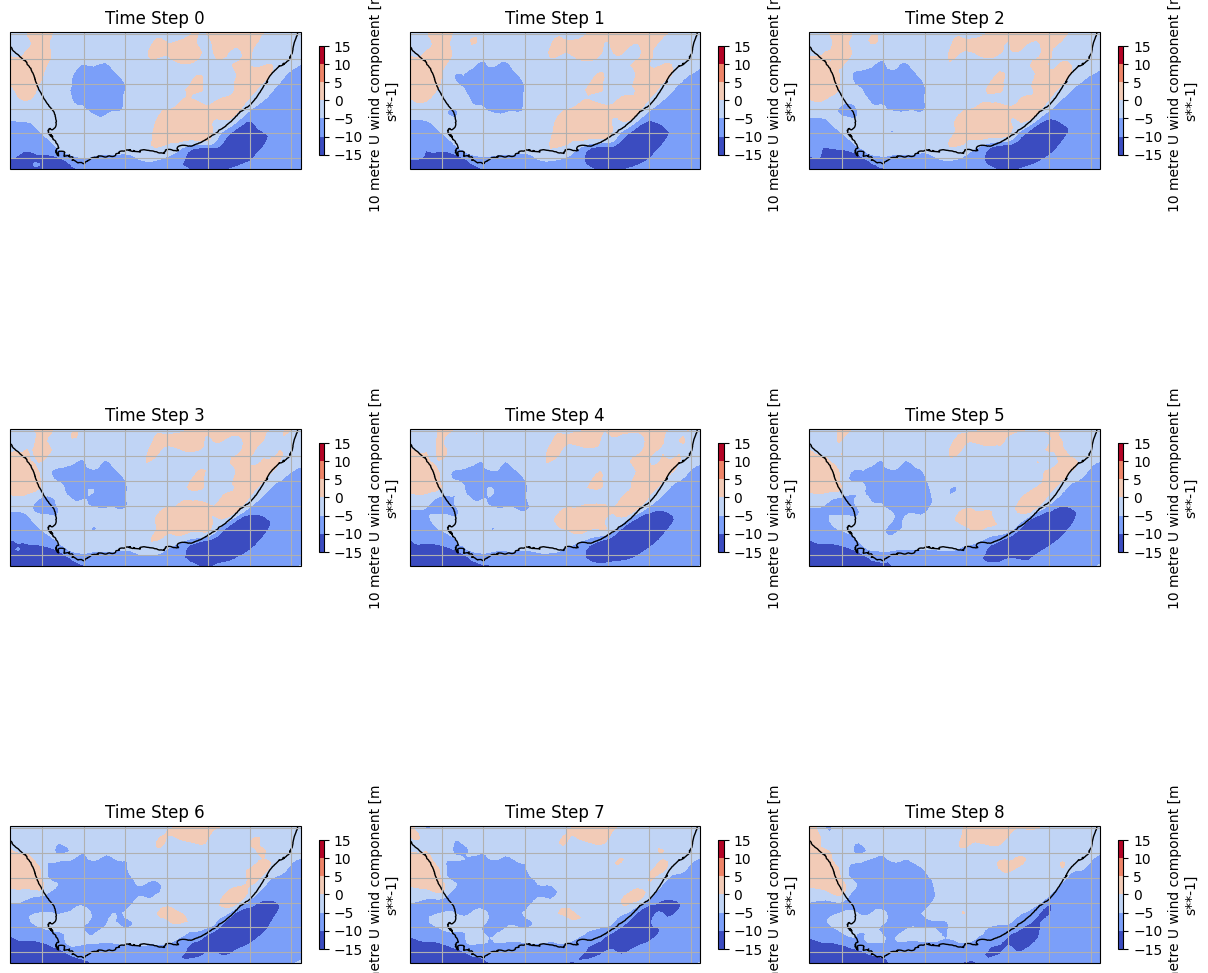

In [92]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Set the seed value for selecting time steps
seed_start = 0
num_plots = 3  # Number of plots in each row and column

# Create a figure and axes for the grid of maps
fig, axs = plt.subplots(num_plots, num_plots, figsize=(15, 15),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axs array to iterate easily
axs = axs.flatten()

for i, ax in enumerate(axs):
    # Calculate the index for time step based on seed_start and current position
    seed = seed_start + i
    
    # Plot the wind speed data for the current time step on the map
    ds_combine['u10'].isel(time=seed).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
                                                     cbar_kwargs={'shrink': 0.3})  # Adjust shrink value as needed
    
    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines()
    
    # Set the title for each subplot
    ax.set_title(f'Time Step {seed}')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()
